# Intermediary Statistics and Statistical Tests

# Directories, Libraries and Data

In [1]:
%cd C:/Users/shrav/Data_Analysis_Projects/Datasets/Intermediary Statistics

C:\Users\shrav\Data_Analysis_Projects\Datasets\Intermediary Statistics


In [2]:
# Libraries

import numpy as np
import pandas as pd
import math as m
import scipy.stats as st
import statsmodels.stats.api as sm

import matplotlib.pyplot as plt

In [3]:
# Load data 
df = pd.read_csv("Wine-quality-challenge.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Normal Distribution 

![](https://media.geeksforgeeks.org/wp-content/uploads/20230901155813/Probability-Distribution-Curve.png "Distribution Curve")

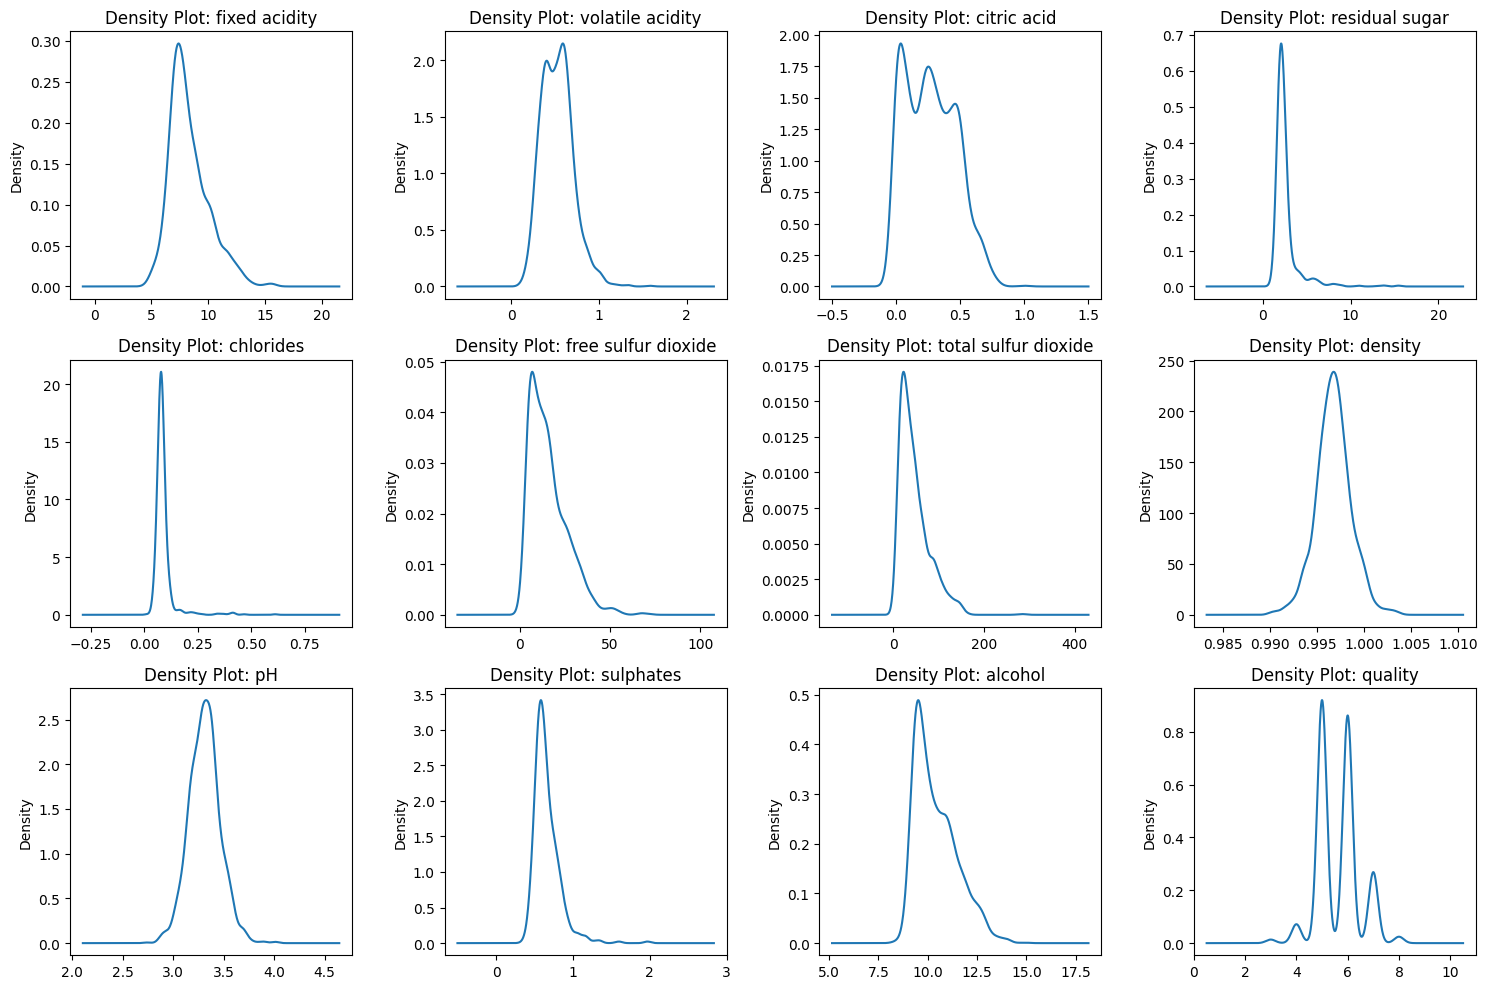

In [8]:
# Density plot for all variables

# Define grid size for 12 plots
rows, cols = 3, 4

fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(15, 10))  # Adjust size as needed
axes = axes.flatten()  # Flatten to iterate easily

for i, col in enumerate(df.columns):
    df[col].plot.density(ax=axes[i])
    axes[i].set_title(f"Density Plot: {col}")

plt.tight_layout()  # Adjust layout
plt.show()

In [9]:
# Check the number of observations within X standard deviations

std_df = pd.DataFrame(columns=["1 STD", "2 STD", "3 STD"])

for i, column in enumerate(df.columns):
    values = []
    
    for deviation in range(1, 4):
        value = df.loc[(df[column] <= df[column].mean() + deviation * df[column].std()) 
                        &
                       (df[column] >= df[column].mean() - deviation * df[column].std())][column].count() / df[column].count()
        values.append(value)
        
    std_df.loc[column] = values

std_df

,1 STD,2 STD,3 STD
fixed acidity,0.739837,0.949969,0.992495
volatile acidity,0.707942,0.964978,0.993746
citric acid,0.587867,0.978111,0.999375
residual sugar,0.913696,0.953096,0.981238
chlorides,0.948093,0.971857,0.980613
free sulfur dioxide,0.717323,0.958724,0.986241
total sulfur dioxide,0.751720,0.949969,0.990619
density,0.727955,0.949343,0.988743
pH,0.710444,0.953096,0.994997
sulphates,0.804878,0.963102,0.983114


# Middle points, 1, 2 and 3 std for the density plots

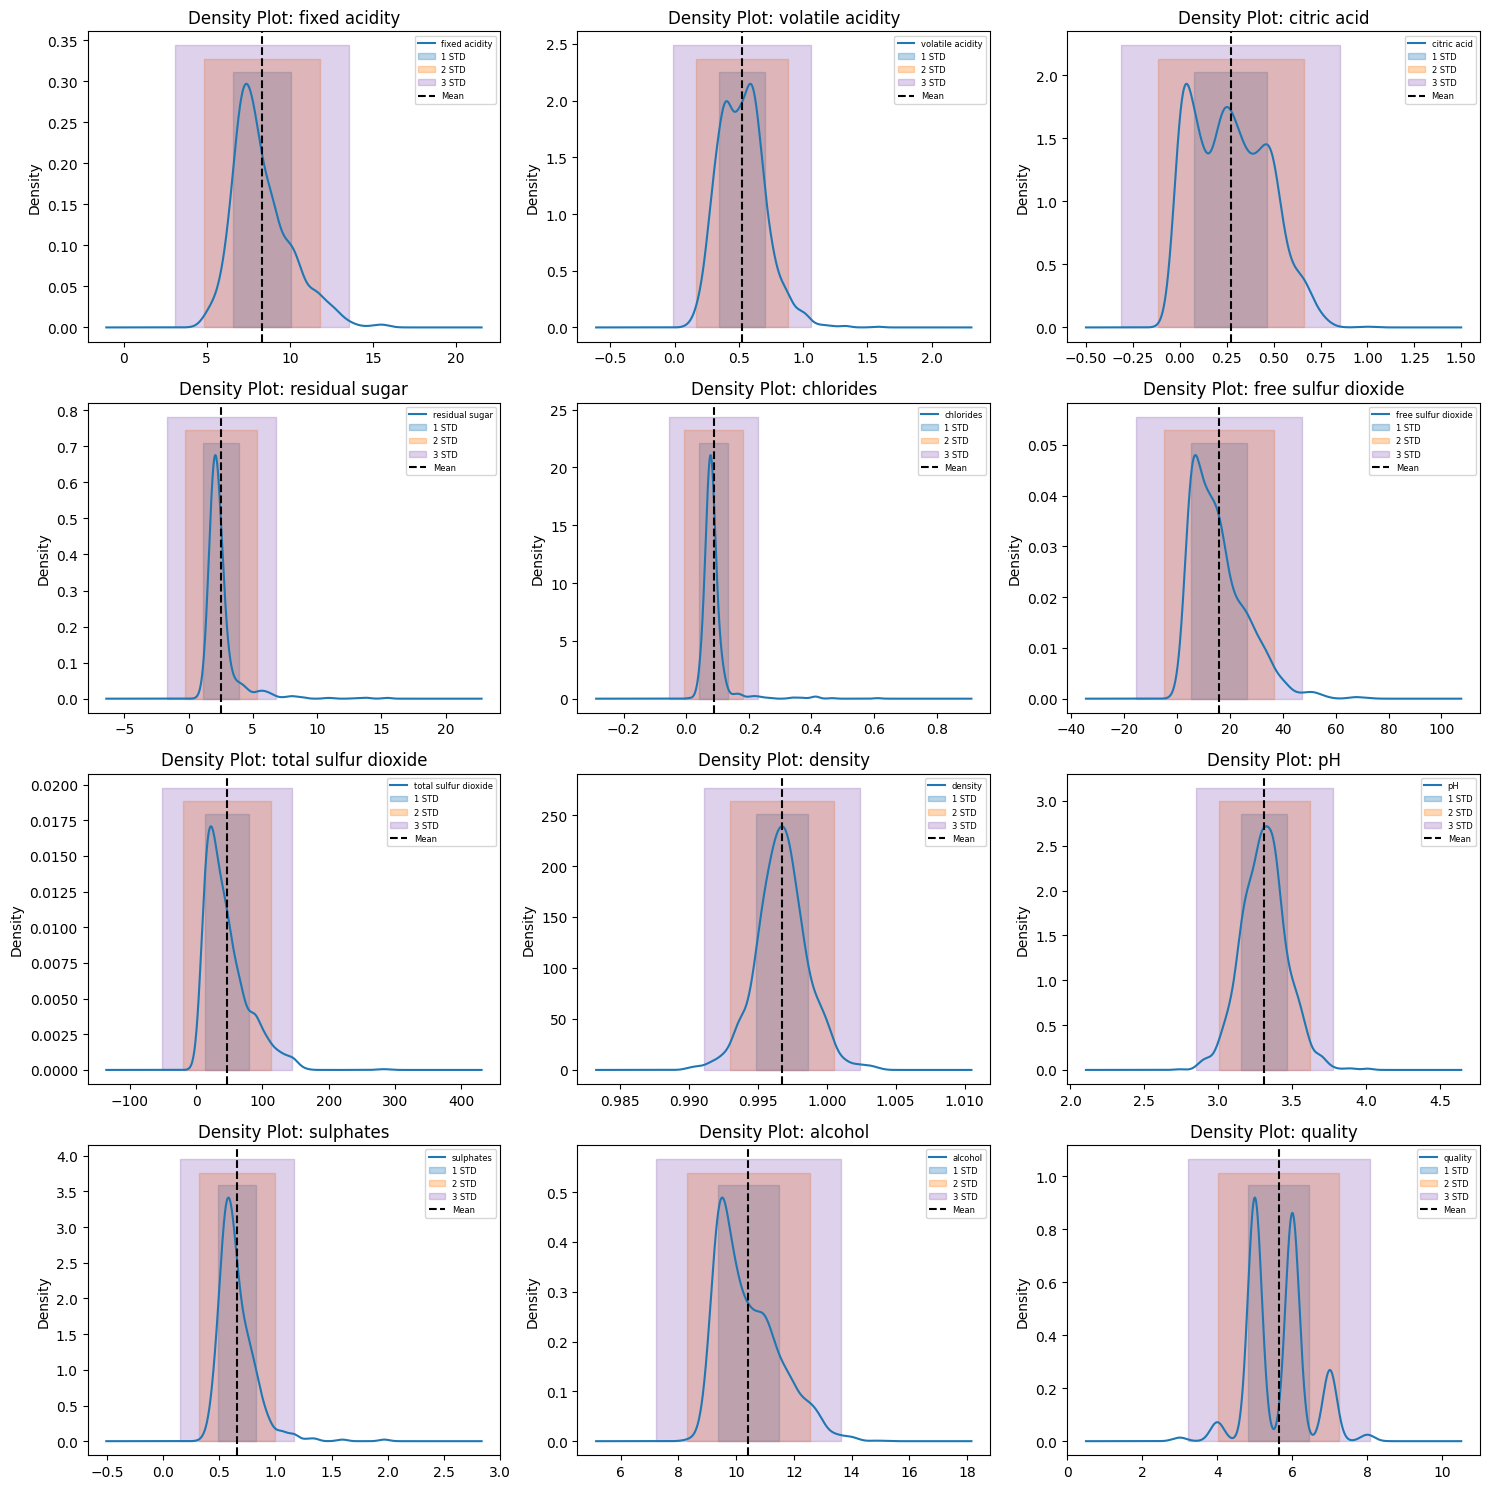

In [10]:
# Density plot for all variables

# Define grid size for 12 plots
rows, cols = 4, 3

fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(15, 15))  # Adjust size as needed
axes = axes.flatten()  # Flatten to iterate easily

for i, col in enumerate(df.columns):
    data = df[col]
    mean = data.mean()
    std = data.std()
    
    df[col].plot.density(ax=axes[i])
    axes[i].set_title(f"Density Plot: {col}")

    for j, color in zip(range(1, 4), ["#1f77b4", "#ff7f0e", "#9467bd"]):
        axes[i].fill_betweenx(
            y=np.linspace(0, axes[i].get_ylim()[1], 500),
            x1=mean - j * std,
            x2=mean + j * std,
            color=color,
            alpha=0.3,
            label=f"{j} STD"
        )
    axes[i].axvline(mean, color='black', linestyle='--', label='Mean')
    axes[i].legend(loc="upper right", fontsize=6)

plt.tight_layout()  # Adjust layout
plt.show()

# p-value
The p-value indicates the probability that the observed result or an even more extreme result will occur if the null hypothesis is true.

# Finding the p-value using Shapiro-Wilk test
The Shapiro–Wilk test is a statistical test that determines if a data set is normally distributed. It's a type of goodness-of-fit test that compares a sample's data to a normal distribution. 

In [11]:
# Shapiro-Wilk test for normality

# Create an empty dictionary to store p-values
p_value_dict = {}

# Iterate over columns in the DataFrame
for column in df.columns:
    statistic, p_value = st.shapiro(df[column])  # Shapiro-Wilk test for normality
    p_value_dict[column] = p_value  # Store p-value in dictionary

# Convert dictionary to DataFrame
p_value_df = pd.DataFrame.from_dict(p_value_dict, orient='index', columns=['p-value'])
p_value_df['Normality'] = p_value_df['p-value'].apply(lambda x: 'Not Gaussian' if x < 0.05 else 'Gaussian')

p_value_df

,p-value,Normality
fixed acidity,1.525012e-24,Not Gaussian
volatile acidity,2.692935e-16,Not Gaussian
citric acid,1.021932e-21,Not Gaussian
residual sugar,1.020162e-52,Not Gaussian
chlorides,1.179056e-55,Not Gaussian
free sulfur dioxide,7.694597e-31,Not Gaussian
total sulfur dioxide,3.573451e-34,Not Gaussian
density,1.936052e-08,Not Gaussian
pH,1.712237e-06,Not Gaussian
sulphates,5.823140e-38,Not Gaussian


# Standard Error Mean(SEM)
Standard error of the mean (SEM) measures how far the sample mean (average) of the data is likely to be from the true population mean. The SEM is always smaller than the SD.

In [14]:
# Standard Error Mean

# Function

sem_dict = {}

# Iterate over columns in the DataFrame
for column in df.columns:
    sem = st.sem(df[column])  # Shapiro-Wilk test for normality
    sem_dict[column] = sem # Store p-value in dictionary

# Convert dictionary to DataFrame
sem_df = pd.DataFrame.from_dict(sem_dict, orient='index', columns=['SEM'])
sem_df['Error'] = sem_df['SEM'].apply(lambda x: 'No Error' if x < 0.1 else 'Error')

sem_df

,SEM,Error
fixed acidity,0.043541,No Error
volatile acidity,0.004478,No Error
citric acid,0.004872,No Error
residual sugar,0.035259,No Error
chlorides,0.001177,No Error
free sulfur dioxide,0.261586,Error
total sulfur dioxide,0.822640,Error
density,0.000047,No Error
pH,0.003861,No Error
sulphates,0.004239,No Error


In [15]:
# Manual
sem_dict = {}

# Iterate over columns in the DataFrame
for column in df.columns:
    sem = df[column].std() / m.sqrt(df[column].count())  # Shapiro-Wilk test for normality
    sem_dict[column] = sem # Store p-value in dictionary

# Convert dictionary to DataFrame
sem_df = pd.DataFrame.from_dict(sem_dict, orient='index', columns=['SEM'])
sem_df['Error'] = sem_df['SEM'].apply(lambda x: 'No Error' if x < 0.1 else 'Error')

sem_df

,SEM,Error
fixed acidity,0.043541,No Error
volatile acidity,0.004478,No Error
citric acid,0.004872,No Error
residual sugar,0.035259,No Error
chlorides,0.001177,No Error
free sulfur dioxide,0.261586,Error
total sulfur dioxide,0.822640,Error
density,0.000047,No Error
pH,0.003861,No Error
sulphates,0.004239,No Error


# Confidence Interval
Confidence Interval is a range where we are certain that true value exists. The selection of a confidence level for an interval determines the probability that the confidence interval will contain the true parameter value. This range of values is generally used to deal with population-based data, extracting specific, valuable information with a certain amount of confidence, hence the term 'Confidence Interval'.

In [16]:
# Confidence Interval of mean

# Manual
ci_dict = {}

# Iterate over columns in the DataFrame
for column in df.columns:
    intervals = st.norm.interval(confidence=0.95,
                                          loc=df[column].mean(),
                                          scale=st.sem(df[column]))
    ci_dict[column] = intervals

# Convert dictionary to DataFrame
ci_df = pd.DataFrame.from_dict(ci_dict, orient='index', columns=['l_interval', 'r_interval'])

ci_df

,l_interval,r_interval
fixed acidity,8.234298,8.404976
volatile acidity,0.519044,0.536597
citric acid,0.261428,0.280524
residual sugar,2.469699,2.607912
chlorides,0.085160,0.089773
free sulfur dioxide,15.362223,16.387620
total sulfur dioxide,44.855447,48.080138
density,0.996654,0.996839
pH,3.303546,3.318680
sulphates,0.649841,0.666457


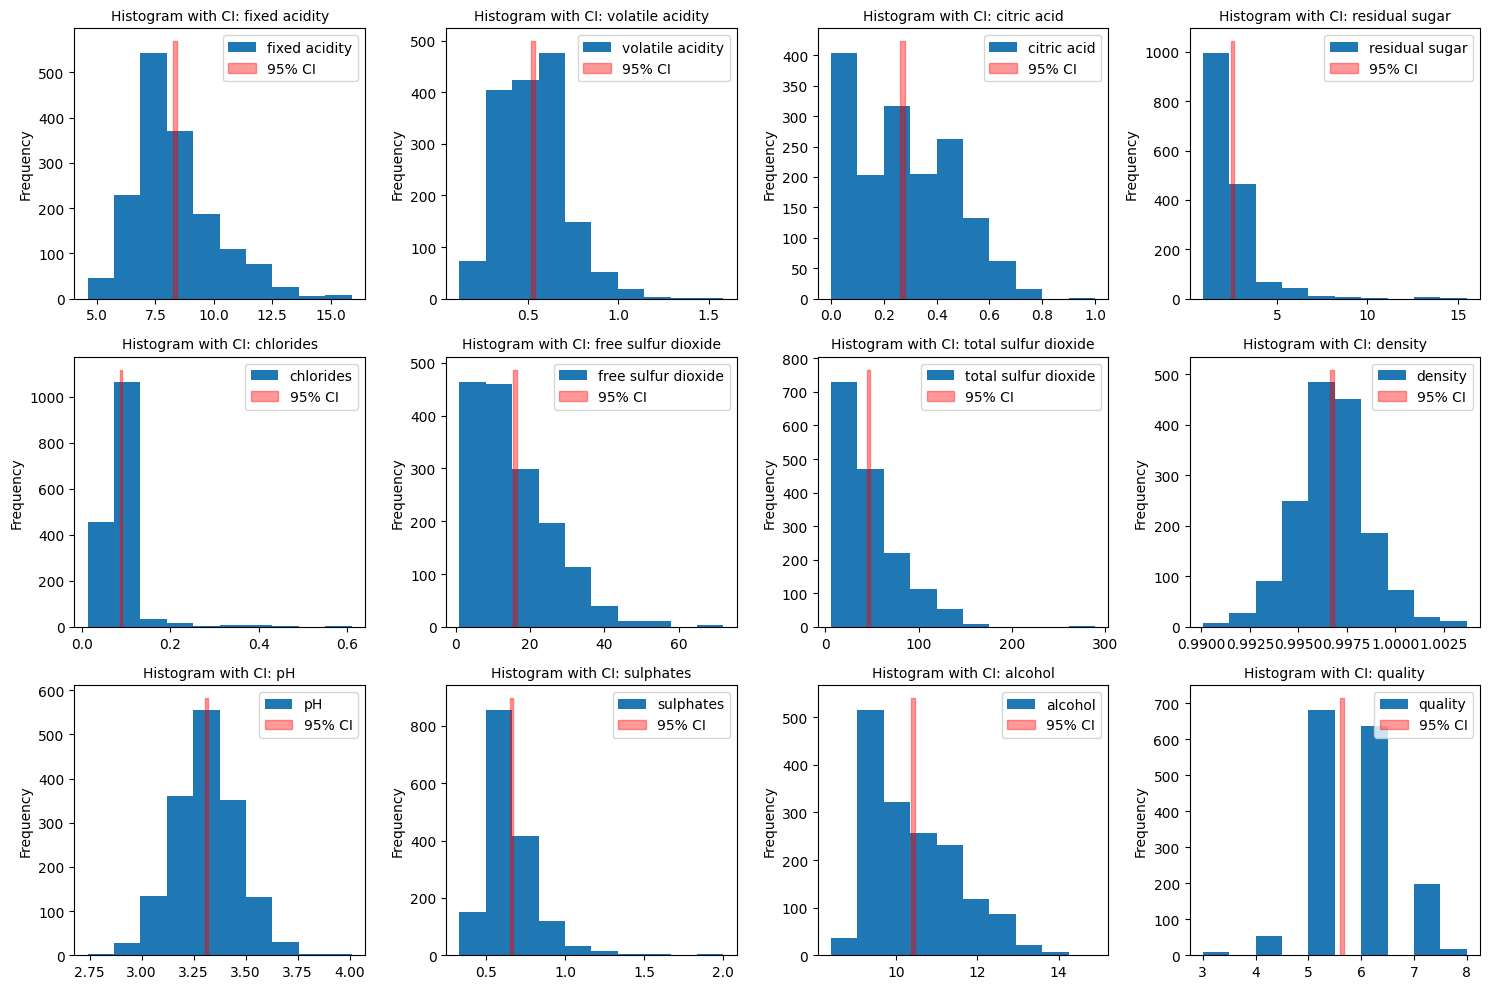

In [17]:
# Histogram for all variables with CI

# Define grid size for 12 plots
rows, cols = 3, 4

fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(15, 10))  # Adjust size as needed
axes = axes.flatten()  # Flatten to iterate easily

for i, col in enumerate(df.columns):
    df[col].plot.hist(ax=axes[i])
    
    l_interval, r_interval = ci_df.loc[col]

    axes[i].fill_betweenx(
        y=np.linspace(0, axes[i].get_ylim()[1], 500),
        x1=l_interval,
        x2=r_interval,
        color='red',
        alpha=0.4,
        label=f'{0.95*100:.0f}% CI'
    )
    axes[i].set_title(f"Histogram with CI: {col}", fontsize=10)
    axes[i].legend(loc="upper right", fontsize=10)
    
plt.tight_layout()  # Adjust layout
plt.show()

# T-test
The t-test is used to compare the averages of two groups to see if they are significantly different from each other.

Let's use a different data set for the upcoming statistical tests

In [18]:
# load data
data = pd.read_csv("stackoverflow.csv")
data.head()

,Country,Salary,YearsCodedJob,OpenSource,Hobby,CompanySizeNumber,Remote,CareerSatisfaction,Data_scientist,Database_administrator,...,Developer_with_stats_math_background,DevOps,Embedded_developer,Graphic_designer,Graphics_programming,Machine_learning_specialist,Mobile_developer,Quality_assurance_engineer,Systems_administrator,Web_developer
0,United Kingdom,100000.000000,20,0,1,5000,Remote,8,0,0,...,0,0,1,0,0,0,0,0,0,0
1,United States,130000.000000,20,1,1,1000,Remote,9,0,0,...,0,1,1,0,0,0,0,1,0,1
2,United States,175000.000000,16,0,1,10000,Not remote,7,0,0,...,0,0,0,0,0,0,0,0,0,1
3,Germany,64516.129030,4,0,0,1000,Not remote,9,0,0,...,0,0,0,0,0,0,0,0,0,1
4,India,6636.323594,1,0,1,5000,Not remote,5,0,0,...,0,0,0,0,0,0,0,0,0,1


In [19]:
countries = list(data.Country.unique())
countries

['United Kingdom', 'United States', 'Germany', 'India', 'Canada']

In [22]:
# t test for Salary and YearsCodedJob (contiguous variables)

# Salary

# create a subset for salaries to check weather the salaries of two different countries are same or not
# H_null for salary = There is no difference between the salaries between two countries
# H_null for job exp = There is no difference between the job experience between two countries

salary_statistics = pd.DataFrame(columns=['Country_1', 'Country_2', 't_statistic_salary', 'p_value_salary'])
job_exp_statistics = pd.DataFrame(columns=['Country_1', 'Country_2', 't_statistic_exp', 'p_value_exp'])
i = 0

for country_1 in countries:
    for country_2 in countries:
        if country_1 == country_2:
            continue
        salary_country_1 = data.loc[data["Country"] == country_1]["Salary"]
        salary_country_2 = data.loc[data["Country"] == country_2]["Salary"]

        job_exp_country_1 = data.loc[data["Country"] == country_1]["YearsCodedJob"]
        job_exp_country_2 = data.loc[data["Country"] == country_2]["YearsCodedJob"]        

        t_statistic_salary, p_value_salary= st.ttest_ind(salary_country_1, salary_country_2)
        t_statistic_exp, p_value_exp = st.ttest_ind(job_exp_country_1, job_exp_country_2)
        i += 1

        salary_statistics.loc[i] = [country_1, country_2, t_statistic_salary, p_value_salary]
        job_exp_statistics.loc[i] = [country_1, country_2, t_statistic_exp, p_value_exp]

salary_statistics = salary_statistics.drop_duplicates(subset=['p_value_salary'], keep='first').reset_index(drop=True)
job_exp_statistics = job_exp_statistics.drop_duplicates(subset=['p_value_exp'], keep='first').reset_index(drop=True)

salary_statistics['salary_conclusion'] = salary_statistics['p_value_salary'].apply(lambda x: 
                                                                                   'The salaries are different (reject H0)' if x < 0.05 
                                                                                    else 'Similar salaries (fail to reject H0')
job_exp_statistics['exp_conclusion'] = job_exp_statistics['p_value_exp'].apply(lambda x: 
                                                                               'The experience are different (reject H0)' if x < 0.05 
                                                                                else 'Similar experience (fail to reject H0')

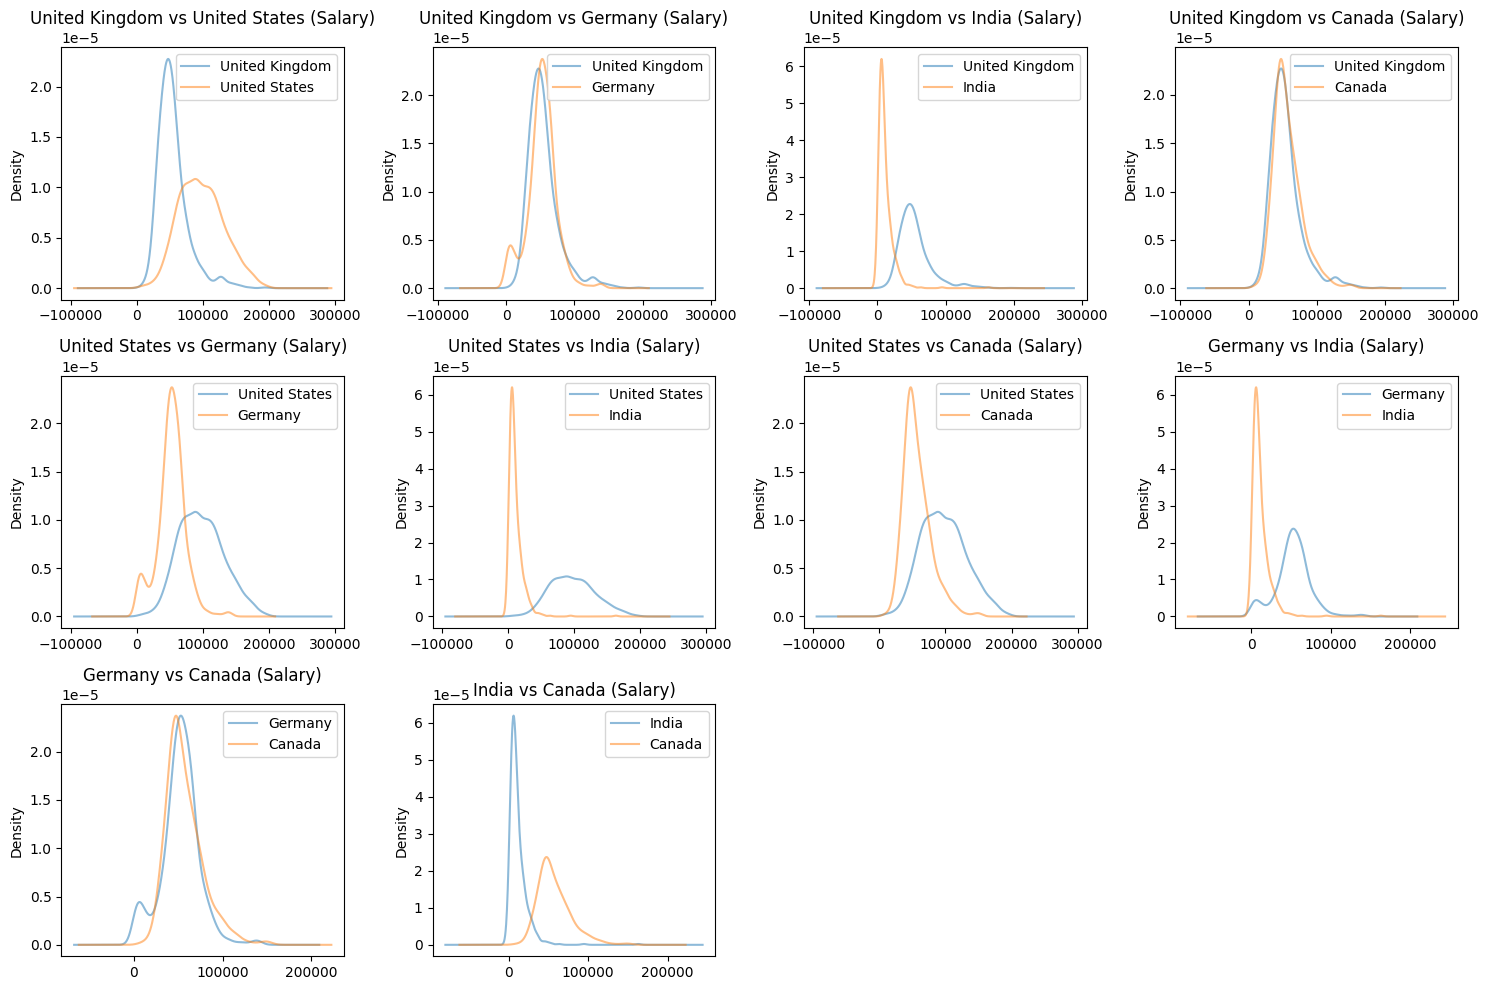

,Country_1,Country_2,t_statistic_salary,p_value_salary,salary_conclusion
0,United Kingdom,United States,-37.635811,7.120078e-264,The salaries are different (reject H0)
1,United Kingdom,Germany,2.222277,2.639000e-02,The salaries are different (reject H0)
2,United Kingdom,India,40.474826,2.016716e-245,The salaries are different (reject H0)
3,United Kingdom,Canada,-2.179296,2.946418e-02,The salaries are different (reject H0)
4,United States,Germany,35.147464,1.841514e-232,The salaries are different (reject H0)
5,United States,India,58.486803,0.000000e+00,The salaries are different (reject H0)
6,United States,Canada,25.473767,9.568224e-131,The salaries are different (reject H0)
7,Germany,India,40.083187,5.186560e-229,The salaries are different (reject H0)
8,Germany,Canada,-4.131547,3.844948e-05,The salaries are different (reject H0)
9,India,Canada,-43.895188,2.625871e-237,The salaries are different (reject H0)


In [23]:
# Define number of rows and columns for the grid
num_plots = len(salary_statistics)  # Total number of comparisons
rows = 3  # Adjust based on the number of plots
cols = 4  # Adjust based on the number of plots

fig, axes = plt.subplots(rows, cols, figsize=(15, 10))  # Create a grid of subplots
axes = axes.flatten()  # Flatten the 2D array for easy iteration

for i in range(num_plots):
    country_1 = salary_statistics.iloc[i, 0]
    country_2 = salary_statistics.iloc[i, 1]

    # Get the correct subplot
    ax = axes[i]

    # Plot histograms
    data[data['Country'] == country_1]["Salary"].plot.density(ax=ax, alpha=0.5, label=country_1)
    data[data['Country'] == country_2]["Salary"].plot.density(ax=ax, alpha=0.5, label=country_2)

    # Add legend and title
    ax.legend()
    ax.set_title(f"{country_1} vs {country_2} (Salary)")

# Remove unused plots
for j in range(num_plots, len(axes)): 
    fig.delaxes(axes[j])

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

salary_statistics # removed reversed countries as the t-stat would be same but reversed signs and p_value would be the same

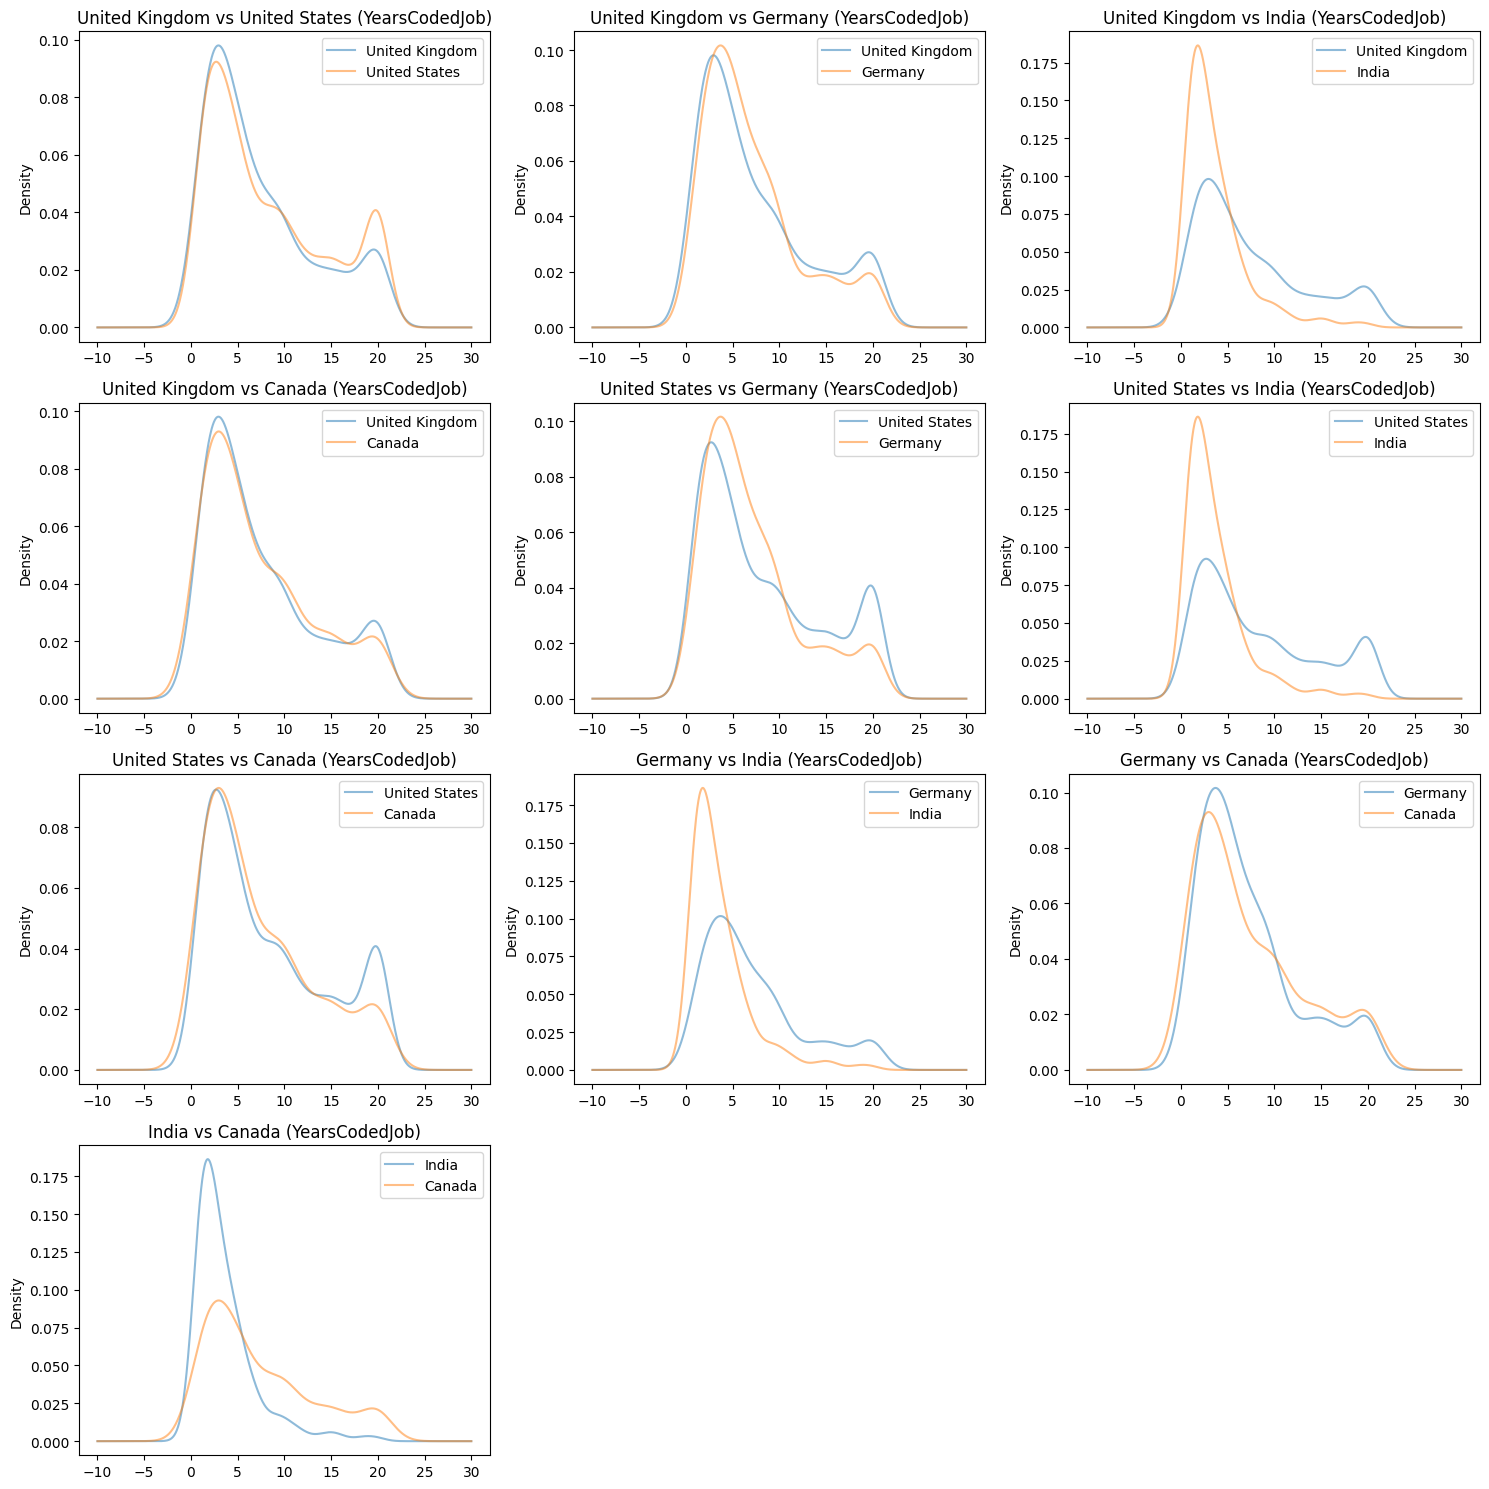

,Country_1,Country_2,t_statistic_exp,p_value_exp,exp_conclusion
0,United Kingdom,United States,-3.539869,4.051092e-04,The experience are different (reject H0)
1,United Kingdom,Germany,1.242731,2.141307e-01,Similar experience (fail to reject H0
2,United Kingdom,India,13.821883,4.476666e-41,The experience are different (reject H0)
3,United Kingdom,Canada,0.421599,6.733780e-01,Similar experience (fail to reject H0
4,United States,Germany,4.539170,5.835123e-06,The experience are different (reject H0)
5,United States,India,16.372922,5.225676e-58,The experience are different (reject H0)
6,United States,Canada,3.053614,2.279208e-03,The experience are different (reject H0)
7,Germany,India,13.444436,1.151502e-38,The experience are different (reject H0)
8,Germany,Canada,-0.626753,5.309367e-01,Similar experience (fail to reject H0
9,India,Canada,-12.516313,1.530939e-33,The experience are different (reject H0)


In [24]:
# Experience

# Define number of rows and columns for the grid
num_plots = len(job_exp_statistics)  # Total number of comparisons
rows = 4  # Adjust based on the number of plots
cols = 3  # Adjust based on the number of plots

fig, axes = plt.subplots(rows, cols, figsize=(15, 15))  # Create a grid of subplots
axes = axes.flatten()  # Flatten the 2D array for easy iteration

for i in range(num_plots):
    country_1 = job_exp_statistics.iloc[i, 0]
    country_2 = job_exp_statistics.iloc[i, 1]

    # Get the correct subplot
    ax = axes[i]

    # Plot histograms
    data[data['Country'] == country_1]["YearsCodedJob"].plot.density(ax=ax, alpha=0.5, label=country_1)
    data[data['Country'] == country_2]["YearsCodedJob"].plot.density(ax=ax, alpha=0.5, label=country_2)

    # Add legend and title
    ax.legend()
    ax.set_title(f"{country_1} vs {country_2} (YearsCodedJob)")

# Remove unused plots
for j in range(num_plots, len(axes)): 
    fig.delaxes(axes[j])

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

job_exp_statistics # removed reversed countries as the t-stat would be same but reversed signs and p_value would be the same

# Chi-Square Test

Chi-squared test, or $\chi^2$ test, indicates that there is a relationship between two entities. For example, it can be demonstrated when we look out for people's favorite colors and their preference for ice cream. The test is instrumental in telling whether these two variables are associated with each other. For instance, it is possible that individuals who prefer the color blue also tend to be in favor of chocolate ice cream.

In [25]:
# cross tabulation between country and remote 
tab = pd.crosstab(data.Country,
                 data.Remote)
tab

Remote,Not remote,Remote
Country,,
Canada,457,28
Germany,717,40
India,482,56
United Kingdom,953,70
United States,2410,381


In [26]:
def p_value_conculsion(p_value):
    if p > 0.05:
        print(f"{p_value}, There is no relationship(fail to reject the null hypothesis)")
    else:
        print(f"{p_value}, There is a strong relationship(we reject the null hypothesis)")

In [28]:
chi2, p, dof, exp = st.chi2_contingency(tab)
p_value_conculsion(p)

3.3211208773012153e-16, There is a strong relationship(we reject the null hypothesis)


In [29]:
# cross tabulation between company size and hobby 
tab = pd.crosstab(data['CompanySizeNumber'],
                 data["Hobby"])
tab

Hobby,0,1
CompanySizeNumber,,
1,101,311
10,123,400
20,293,961
100,245,918
500,91,309
1000,180,436
5000,60,192
10000,243,731


In [30]:
chi2, p, dof, exp = st.chi2_contingency(tab)
p

p_value_conculsion(p)

0.025708455559671047, There is a strong relationship(we reject the null hypothesis)
